<a href="https://colab.research.google.com/github/gt6192/NeuralNetworks/blob/main/MPNeuron/MP_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Defining Dataset**

In [ ]:
import sklearn.datasets
import numpy as np

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
X = breast_cancer.data
Y = breast_cancer.target

In [ ]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [ ]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [ ]:
import pandas as pd 

In [ ]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [ ]:
data['class'] = breast_cancer.target

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [ ]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [ ]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('class', axis=1)
Y = data['class']

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (426, 30) (143, 30)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (512, 30) (57, 30)


In [ ]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [ ]:
print(X.mean(), X_train.mean(), X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

In [ ]:
print(X.mean(), X_train.mean(), X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

# **Binarisation**

In [ ]:
import matplotlib.pyplot as plt

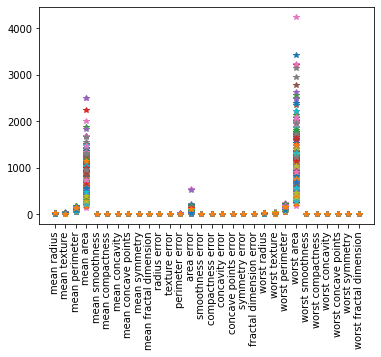

In [ ]:
plt.plot(X_train.T, '*')
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)

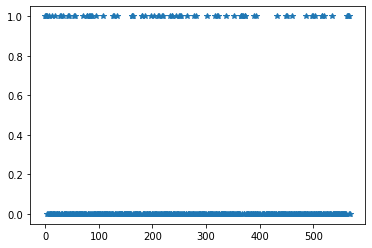

In [ ]:
plt.plot(X_binarised_3_train, '*')

In [ ]:
X_banirised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

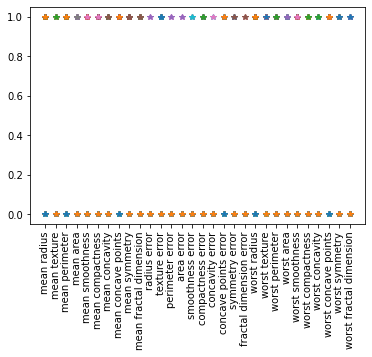

In [ ]:
plt.plot(X_banirised_train.T, '*')
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
X_banirised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [ ]:
X_banirised_train = X_banirised_train.values
X_banirised_test = X_banirised_test.values

In [ ]:
print(type(X_banirised_train))
print(type(X_banirised_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# **Mp Neuron Model**

In [ ]:
from random import randint

In [ ]:
b = 3

i = randint(0, X_banirised_train.shape[0])

print("for row", i)

if(np.sum(X_banirised_train[100, :])>=b):
  print("MP neuron inference is malignent")
else:
  print("MP neuron inference is benign")

if (Y_train[i] == 1):
  print("ground truth is malignent")
else:
  print("ground truth is benign")

for row 129
MP neuron inference is benign
ground truth is benign


In [ ]:
b = 3

Y_pred_train = []
accurate_row = 0

for x, y in zip(X_banirised_train, Y_train):
  y_pred = (np.sum(x) >= b)
  Y_pred_train.append(y_pred)
  accurate_row += (y == y_pred)

print(accurate_row, accurate_row/X_banirised_train.shape[0])

77 0.150390625


In [ ]:
for b in range(X_banirised_train.shape[1]+1):
  Y_pred_train = []
  accurate_row = 0

  for x, y in zip(X_banirised_train, Y_train):
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    accurate_row += (y == y_pred)

  print(b, accurate_row/X_banirised_train.shape[0])

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# b = 28
for b in range(X_banirised_test.shape[1]+1):
  Y_pred_test = []

  for x in X_banirised_test:
    y_pred = (np.sum(x) >= b)
    Y_pred_test.append(y_pred)

  accuracy = accuracy_score(Y_pred_test, Y_test)
  print(b, accuracy)

0 0.631578947368421
1 0.631578947368421
2 0.631578947368421
3 0.631578947368421
4 0.6491228070175439
5 0.6491228070175439
6 0.6491228070175439
7 0.6491228070175439
8 0.6491228070175439
9 0.6666666666666666
10 0.6666666666666666
11 0.6842105263157895
12 0.7017543859649122
13 0.7017543859649122
14 0.7192982456140351
15 0.7192982456140351
16 0.7543859649122807
17 0.7894736842105263
18 0.8070175438596491
19 0.8596491228070176
20 0.8947368421052632
21 0.8947368421052632
22 0.9122807017543859
23 0.8947368421052632
24 0.8771929824561403
25 0.8421052631578947
26 0.8596491228070176
27 0.8596491228070176
28 0.7894736842105263
29 0.6140350877192983
30 0.47368421052631576


# **MP Neuron Class**

In [ ]:
class MPNeuron:


  def __init__(self):
    self.b = None


  def model(self, x):
    return(sum(x) >= self.b)


  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)


  def fit(self, X, Y):
    accuracy = {}

    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)


    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b

    print("Optimal value of b is", best_b)
    print("Highest accuracy is", accuracy[best_b])

In [ ]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_banirised_test, Y_test)

Optimal value of b is 22
Highest accuracy is 0.9122807017543859
